In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tw_weighted = pd.read_csv('TSEC_weighted_index.csv') # 2015/04/30 ~ 2019/04/29

In [3]:
tw_weighted.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-30,9841.150391,9894.900391,9820.049805,9820.049805,9820.012695,2644700.0
1,2015-05-04,9853.509766,9871.650391,9800.480469,9845.040039,9845.002930,2298800.0
2,2015-05-05,9849.129883,9855.639648,9788.129883,9820.129883,9820.092773,2134800.0
3,2015-05-06,9780.389648,9829.429688,9735.940430,9818.200195,9818.163086,2353700.0
4,2015-05-07,9789.820313,9789.820313,9704.110352,9704.110352,9704.073242,2315900.0


In [4]:
tw_weighted_adjclose_volume = tw_weighted[['Date','Adj Close','Volume']] # slice出調整後收盤價跟交易量

In [5]:
tw_weighted_adjclose_volume.head()

,Date,Adj Close,Volume
0,2015-04-30,9820.012695,2644700.0
1,2015-05-04,9845.002930,2298800.0
2,2015-05-05,9820.092773,2134800.0
3,2015-05-06,9818.163086,2353700.0
4,2015-05-07,9704.073242,2315900.0


In [6]:
vix = pd.read_csv('^VIX.csv') # 2015/04/29 - 2019/04/29

In [7]:
vix_adjclose_volume = vix[['Date','Adj Close','Volume']]

In [8]:
vix_adjclose_volume.head()

,Date,Adj Close,Volume
0,2015-04-29,13.39,0
1,2015-04-30,14.55,0
2,2015-05-01,12.70,0
3,2015-05-04,12.85,0
4,2015-05-05,14.31,0


In [9]:
newdf = pd.merge(tw_weighted_adjclose_volume, vix_adjclose_volume, on='Date', how='inner')
newdf = newdf.dropna() # drop null value

In [10]:
newdf.head()

,Date,Adj Close_x,Volume_x,Adj Close_y,Volume_y
0,2015-04-30,9820.012695,2644700.0,14.55,0
1,2015-05-04,9845.002930,2298800.0,12.85,0
2,2015-05-05,9820.092773,2134800.0,14.31,0
3,2015-05-06,9818.163086,2353700.0,15.15,0
4,2015-05-07,9704.073242,2315900.0,15.13,0


### 目標：利用vix的Adj Close當label，台股大盤加權指數Adj Close當target

In [11]:
X = newdf.iloc[:, 3].values
y = newdf.iloc[:, 1].values

In [12]:
X.shape

(942,)

In [13]:
y.shape

(942,)

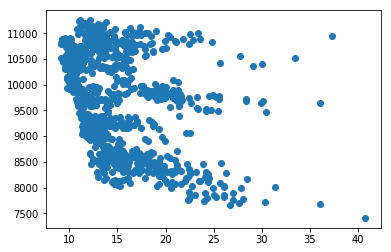

In [14]:
plt.scatter(X,y)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

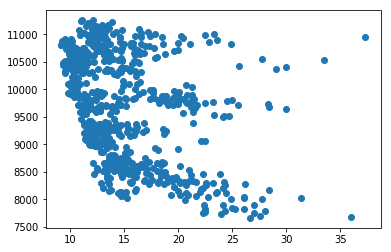

In [17]:
plt.scatter(X_train, y_train)

In [18]:
# Fitting Lineaer Regressioin to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_train = X_train.reshape(-1,1)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=6)
pipeline = Pipeline(
    [('poly', poly),('lin reg', lin_reg)]
)

In [20]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=6, include_bias=True, interaction_only=False)), ('lin reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### 利用vix polynomial (degree=6) 預估台股大盤指數

In [21]:
X_test = X_test.reshape(-1,1)
y_pred = pipeline.predict(X_test)

Text(0, 0.5, 'TW weighted Index')

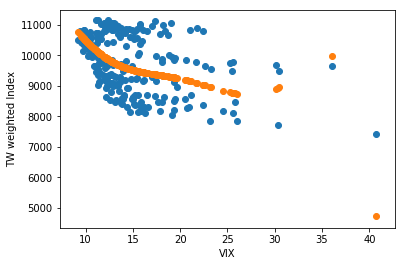

In [27]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.xlabel('VIX')
plt.ylabel('TW weighted Index')

In [23]:
print('Prediction score:', pipeline.score(X_train, y_train))

Prediction score: 0.21736712506616618
